
### 
A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. We’ve all record and data with three different dataset – Book dataset (ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L); Users dataset (User-ID, Location, Age); Ratings dataset (User-ID, ISBN, Book-Rating). Providing specific data analysis and prediction to be done with this data. The main objective is to build a predictive recommender model, which could help in predicting – how we can predict the best recommendation for users according to their items approach. This would help us in providing better recommendation item to a right specific user.





In [1]:
import pandas as pd
import numpy as np


In [2]:
books= pd.read_csv(r'C:\Users\Sanjeev Mishra\Downloads\Project 274\Books.csv', encoding='latin-1',low_memory=False)

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
books.shape

(271360, 8)

In [6]:
ratings=pd.read_csv(r'C:\Users\Sanjeev Mishra\Downloads\Project 274\Ratings.csv')

In [7]:
ratings.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
ratings.shape

(1149780, 3)

In [10]:
users = pd.read_csv(r'C:\Users\Sanjeev Mishra\Downloads\Project 274\Users.csv')

In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [13]:
users.shape

(278858, 3)

# Data Preparation (Data Cleaning and Feature Engineering)

In [14]:
# droping the url
# books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [15]:
# replacing features name in lower case
books.columns= books.columns.str.strip().str.lower()
users.columns= users.columns.str.strip().str.lower()
ratings.columns= ratings.columns.str.strip().str.lower()

In [16]:
pd.set_option('display.max_colwidth', None)

In [17]:
books.isnull().sum()

isbn                   0
book-title             0
book-author            1
year-of-publication    0
publisher              2
image-url-s            0
image-url-m            0
image-url-l            3
dtype: int64

In [18]:
# nan values in particular column
books.loc[(books['book-author'].isnull()),: ]

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [19]:
# nan values in particular column
books.loc[(books['publisher'].isnull()),: ]

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [20]:
# getting unique value from 'year_of_publication' feature
books['year-of-publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [21]:
# Extracting and fixing mismatch in feature 'year-of-publication', 'publisher', 'book_author', 'book_title'
books[books['year-of-publication'] == 'DK Publishing Inc'] 

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [22]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
books[books['year-of-publication'] == 'Gallimard']

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [23]:
books.loc[209538]

isbn                                                                                                             078946697X
book-title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book-author                                                                                                            2000
year-of-publication                                                                                       DK Publishing Inc
publisher                                                      http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
image-url-s                                                    http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image-url-m                                                    http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image-url-l                                                                                                             NaN
Name: 20

In [24]:
books.loc[209538]

isbn                                                                                                             078946697X
book-title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book-author                                                                                                            2000
year-of-publication                                                                                       DK Publishing Inc
publisher                                                      http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
image-url-s                                                    http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image-url-m                                                    http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image-url-l                                                                                                             NaN
Name: 20

In [25]:
books.loc[220731]

isbn                                                                                 2070426769
book-title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book-author                                                                                2003
year-of-publication                                                                   Gallimard
publisher                          http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
image-url-s                        http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
image-url-m                        http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
image-url-l                                                                                 NaN
Name: 220731, dtype: object

In [26]:
# function to fix mismatch data in feature 'book-title', 'book-author', ' year-of-publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [27]:
books
# book_list = books[['book-title']]
books.head()

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [28]:
replace_df_value(books, 209538, 'book-title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(books, 209538, 'book-author', 'Michael Teitelbaum')
replace_df_value(books, 209538, 'year-of-publication', 2000)
replace_df_value(books, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 221678, 'book-title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(books, 221678, 'book-author', 'James Buckley')
replace_df_value(books, 221678, 'year-of-publication', 2000)
replace_df_value(books, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 220731,'book-title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(books, 220731, 'book-author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(books, 220731, 'year-of-publication', 2003)
replace_df_value(books, 220731, 'publisher', 'Gallimard')

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg


In [29]:
books.loc[209538]

isbn                                                                                       078946697X
book-title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book-author                                                                        Michael Teitelbaum
year-of-publication                                                                              2000
publisher                                                                           DK Publishing Inc
image-url-s                              http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image-url-m                              http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image-url-l                                                                                       NaN
Name: 209538, dtype: object

In [30]:
books.loc[221678]

isbn                                                                                                   0789466953
book-title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book-author                                                                                         James Buckley
year-of-publication                                                                                          2000
publisher                                                                                       DK Publishing Inc
image-url-s                                          http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg
image-url-m                                          http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg
image-url-l                                                                                                   NaN
Name: 221678, dtype: object

In [31]:
books.loc[220731]

isbn                                                                     2070426769
book-title                                    Peuple du ciel, suivi de 'Les Bergers
book-author                                         Jean-Marie Gustave Le ClÃ?Â©zio
year-of-publication                                                            2003
publisher                                                                 Gallimard
image-url-s            http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
image-url-m            http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
image-url-l                                                                     NaN
Name: 220731, dtype: object

###

Now it is been fixed. We can view perfect matching for their corresponding features.

We've seen there are two missing values in the 'publisher' column. Let's take care of that. As we have seen


In [32]:
books.loc[(books['publisher'].isnull()),: ]

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [33]:
# replacing 'Nan' with 'No Mention'
books.loc[(books['isbn'] == '193169656X'),'publisher'] = 'No Mention'
books.loc[(books['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [34]:
books[books['publisher'] == 'No Mention']



,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


###

So we've change the publisher's name from 'NaN' to 'No Mention'.

In [35]:
# users data size
print(users.shape)

(278858, 3)


In [36]:
# unique value in age
users['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

### 


There is NaN value in age. We can replace NaN with mean of 'age'.




In [37]:
# replacing nan with average of 'age'
users['age'].fillna((users['age'].mean()), inplace=True)

In [38]:
users['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [39]:
# retrieving age data between 5 to 90
users.loc[(users['age'] > 90) | (users['age'] < 5)] = np.nan

In [40]:
users['age'].unique()

array([34.7514337, 18.       , 17.       , 61.       , 26.       ,
       14.       , 25.       , 19.       , 46.       , 55.       ,
       32.       , 24.       , 20.       , 34.       , 23.       ,
       51.       , 31.       , 21.       , 44.       , 30.       ,
       57.       , 43.       , 37.       , 41.       , 54.       ,
       42.       , 50.       , 39.       , 53.       , 47.       ,
       36.       , 28.       , 35.       , 13.       , 58.       ,
       49.       , 38.       , 45.       , 62.       , 63.       ,
       27.       , 33.       , 29.       , 66.       , 40.       ,
       15.       , 60.       ,        nan, 79.       , 22.       ,
       16.       , 65.       , 59.       , 48.       , 72.       ,
       56.       , 67.       , 80.       , 52.       , 69.       ,
       71.       , 73.       , 78.       ,  9.       , 64.       ,
       12.       , 74.       , 75.       , 76.       , 83.       ,
       68.       , 11.       , 77.       , 70.       ,  8.    

In [41]:
users['age'].fillna((users['age'].mean()), inplace=True)

In [42]:
users['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

In [43]:
ratings.head()

,user-id,isbn,book-rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [44]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings[ratings.isbn.isin(books.isbn)]
unique_ratings



,user-id,isbn,book-rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [45]:
print(ratings.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [46]:
# unique ratings from 'book_rating' feature
unique_ratings['book-rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

# Data Visualizations

### 
Which are the top Author with number of books ?

Text(0.5, 1.0, 'Top 20 author with number of books')

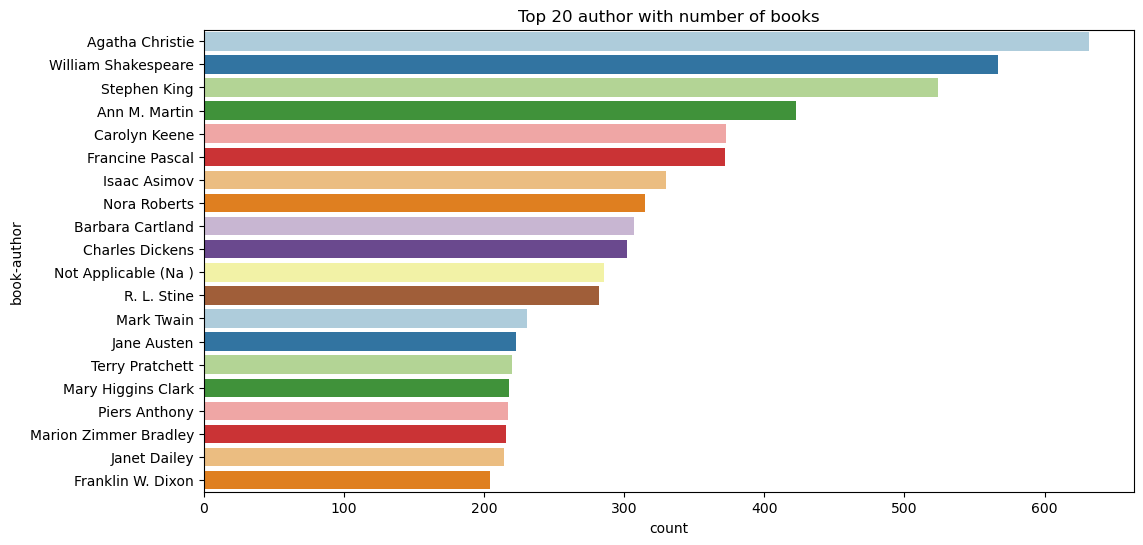

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y="book-author",palette = 'Paired', data=books, order=books['book-author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

### 
Which are top publishers with published books ?

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

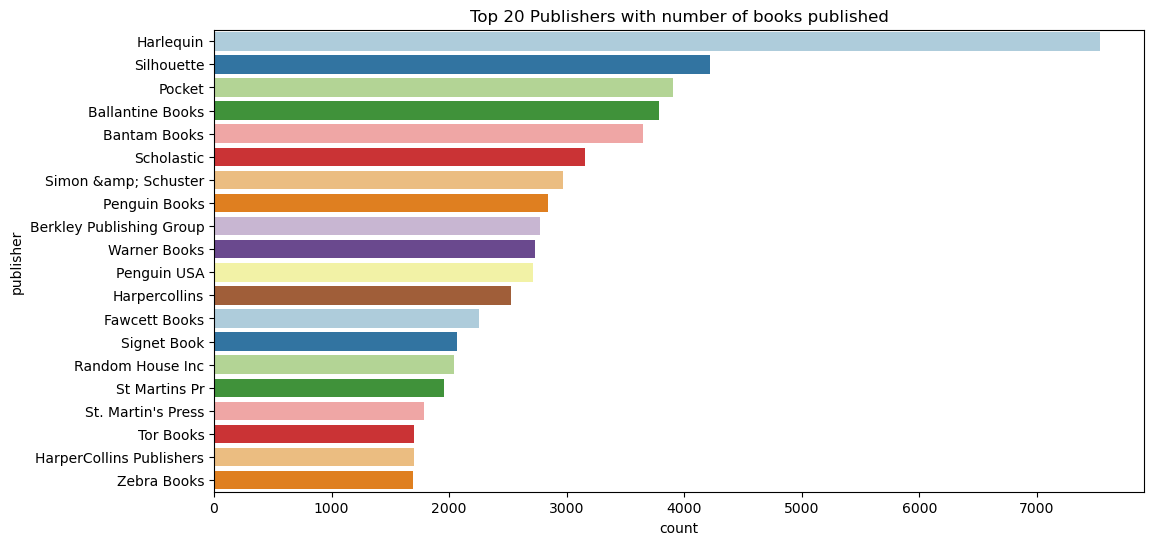

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=books,order=books['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

### 
Harlequin has most number of books published, followed by Silhouette. Hypothesis analysis to focus :-


### 
Age distributions of users_data

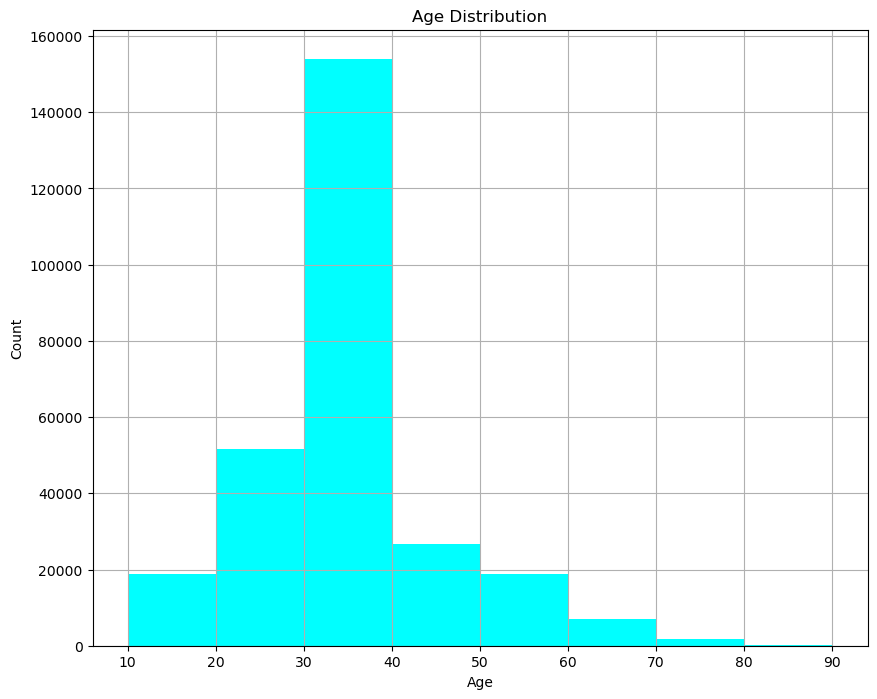

In [49]:
plt.figure(figsize=(10,8))
users.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 
Looking towards the users age between 30-40 prefer more and somewhat we can also view between 20-30. 



In [50]:
### What are top 20 books as per number of ratings ?

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

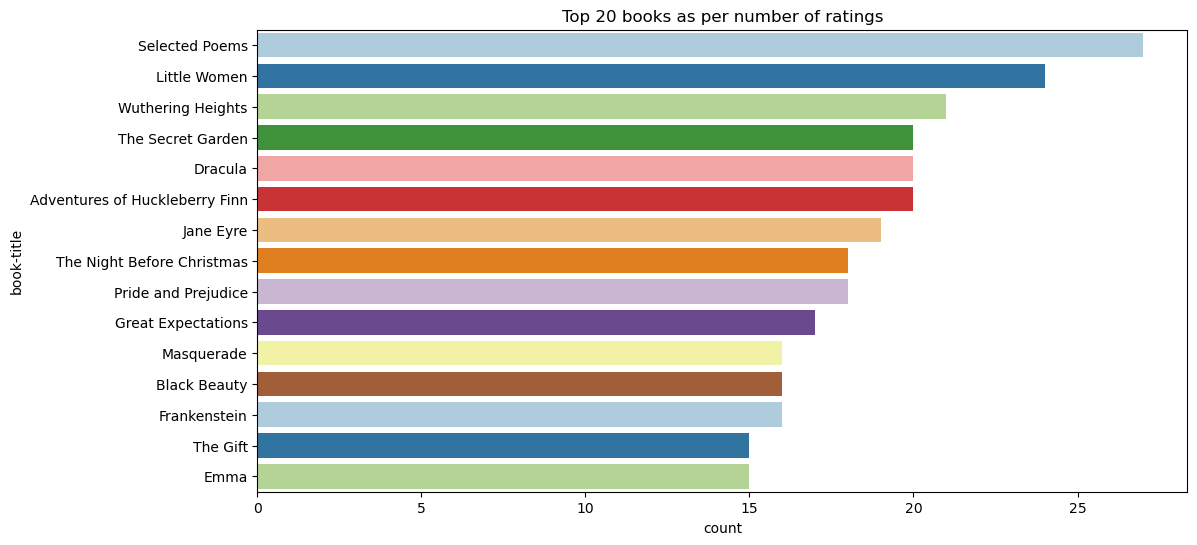

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(y="book-title",palette = 'Paired',data= books, order=books['book-title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

###  
As per ratings "Selected Poems" has been rated most followed by "Little Women".

Text(0.5, 1.0, 'Explicit Ratings')

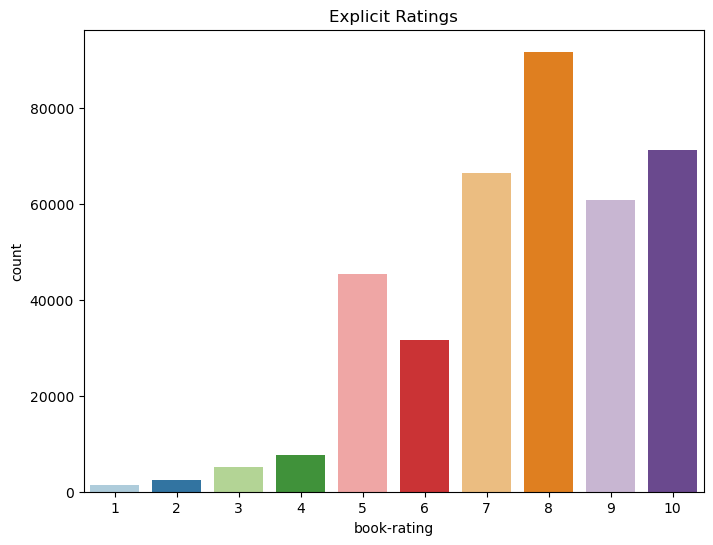

In [52]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book-rating'] != 0]
sns.countplot(x="book-rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

### 
Now this countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times

### Popularity Based Recommender System

In [53]:
# Merging books dataset and ratings_explicit
ratings_with_name= pd.merge(books, ratings, on='isbn')
ratings_with_name.head()

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l,user-id,book-rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,41385,0


In [54]:
books['image-url-m'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [55]:
books.isnull().sum()

isbn                   0
book-title             0
book-author            1
year-of-publication    0
publisher              0
image-url-s            0
image-url-m            0
image-url-l            3
dtype: int64

In [56]:
users.isnull().sum()

user-id     1312
location    1312
age            0
dtype: int64

In [57]:
ratings.isnull().sum()

user-id        0
isbn           0
book-rating    0
dtype: int64

In [58]:
books.duplicated().sum()

0

In [59]:
ratings.duplicated().sum()

0

In [60]:
users.duplicated().sum()

1311

In [61]:
users.drop_duplicates(keep=False, inplace=True)

In [62]:
users.duplicated().sum()

0

In [63]:
# group by the number of ratings for each book
num_rating_df = ratings_with_name.groupby('book-title').count()['book-rating'].reset_index()
num_rating_df.rename(columns={'book-rating':'num_ratings'},inplace=True)
num_rating_df

,book-title,num_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [64]:
print(ratings_with_name['book-rating'].unique())

[ 0  5  8  9  7  6 10  4  3  2  1]


In [65]:
# group by the average ratings for each book
ratings_with_name['book-rating'] = pd.to_numeric(ratings_with_name['book-rating'], errors='coerce')

In [66]:
avg_rating_df = ratings_with_name.groupby('book-title')['book-rating'].mean().reset_index()

In [67]:
avg_rating_df.rename(columns={'book-rating': 'avg_rating'}, inplace=True)
avg_rating_df

,book-title,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [68]:
# merge num_rating_df and avg_rating_df
popular_df = num_rating_df.merge(avg_rating_df,on='book-title')
popular_df

,book-title,num_ratings,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [69]:
# only keep the books whose number of ratings are more than 250
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [70]:
popular_df = popular_df.merge(books,on='book-title').drop_duplicates('book-title')[['book-title','book-author','image-url-m','num_ratings','avg_rating']]

In [71]:
popular_df

,book-title,book-author,image-url-m,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg,278,5.737410
9,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.01.MZZZZZZZ.jpg,281,5.007117
17,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.01.MZZZZZZZ.jpg,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg,510,4.700000


# Collaborative Filtering Based Recommender System

In [72]:
# users who have rated more than 200 times
x = ratings_with_name.groupby('user-id').count()['book-rating'] > 200
padhe_likhe_users = x[x].index

In [73]:
filtered_rating = ratings_with_name[ratings_with_name['user-id'].isin(padhe_likhe_users)]

In [74]:
# books which have been rated more than 50 times
y = filtered_rating.groupby('book-title').count()['book-rating']>=50
famous_books = y[y].index

In [75]:
final_ratings = filtered_rating[filtered_rating['book-title'].isin(famous_books)]

In [76]:
pt = final_ratings.pivot_table(index='book-title',columns='user-id',values='book-rating')

In [77]:
pt.fillna(0,inplace=True)


In [78]:
pt

user-id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
book-title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
similarity_scores = cosine_similarity(pt)

In [81]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [82]:
similarity_scores.shape

(706, 706)

In [83]:
def recommend(book_name):
    # fetch index using book_name
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key = lambda x: x[1], reverse=True)[1:6]
    
    data=[]
    for i in similar_items:
        items=[]
#         print(pt.index[i[0]])
        temp_df = books[books['book-title'] == pt.index[i[0]]]
        items.extend(list(temp_df.drop_duplicates('book-title')['book-title'].values))
        items.extend(list(temp_df.drop_duplicates('book-title')['book-author'].values))
        items.extend(list(temp_df.drop_duplicates('book-title')['image-url-m'].values))
        
        data.append(items)
    return data

In [84]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [85]:
pt.index[545]

"The Handmaid's Tale"

In [86]:
# Saving the Recommendation System
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [87]:
# books.drop_duplicates('book-title')

In [88]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [89]:
## pd.options.mode.chained_assignment = None  # default='warn'
## book_list.drop_duplicates(subset ="book-title",keep = False, inplace = True)